Saving FinalCountryDataset.csv to FinalCountryDataset (68).csv
Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


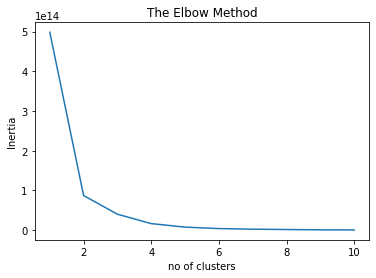

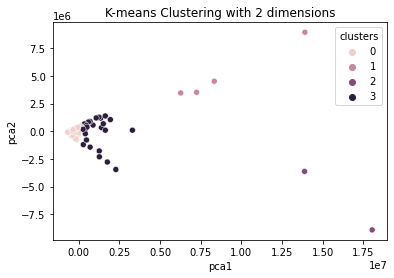

                       country  Surface area (km2)  ...  Melanesia  clusters
0                  Afghanistan            652864.0  ...          0         0
1                      Albania             28748.0  ...          0         0
2                      Algeria           2381741.0  ...          0         3
3               American Samoa               199.0  ...          0         0
4                      Andorra               468.0  ...          0         0
..                         ...                 ...  ...        ...       ...
224  Wallis and Futuna Islands               142.0  ...          0         0
225             Western Sahara            266000.0  ...          0         0
226                      Yemen            527968.0  ...          0         0
227                     Zambia            752612.0  ...          0         0
228                   Zimbabwe            390757.0  ...          0         0

[229 rows x 60 columns]


In [70]:
import numpy as np 
import pandas as pd
import io
import csv
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from google.colab import files
from google.colab import drive
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
import seaborn as sns
uploaded = files.upload()
from google.colab import drive
drive.mount('drive')

Before_imputation = pd.read_csv(io.StringIO(uploaded['FinalCountryDataset.csv'].decode('utf-8')))
Before_imputation.isnull().sum
x = Before_imputation.iloc[:,[3,4]].values
score = []
for cluster in range(1, 11):
  kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=10)
  kmeans.fit(x)
  score.append(kmeans.inertia_)
plt.plot(range(1,11), score)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('Inertia')
plt.show()

input_data = pd.read_csv('FinalCountryDataset.csv')
col = input_data['country']
input_data.drop('country', axis = 1, inplace = True)

# kmeans
features = list(input_data.columns)
data = input_data[features]
clustering_kmeans = KMeans(n_clusters=4, precompute_distances="auto", n_jobs=-1)
data['clusters'] = clustering_kmeans.fit_predict(data)

# plotting
reduced_data = PCA(n_components=2).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
sns.scatterplot(x="pca1", y="pca2", hue=data['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

# adding country column back into data
data = data.merge(col, left_index = True, right_index = True)
cols = list(data.columns)
cols = [cols[-1]] + cols[:-1]
data = data[cols]

print(data)

# export cluster 0
df = data[data['clusters'] == 0]
df.to_csv('kmeans_0.csv')
!cp kmeans_0.csv "drive/My Drive/"

# export cluster 1
df = data[data['clusters'] == 1]
df.to_csv('kmeans_1.csv')
!cp kmeans_1.csv "drive/My Drive/"

# export cluster 2
df = data[data['clusters'] == 2]
df.to_csv('kmeans_2.csv')
!cp kmeans_2.csv "drive/My Drive/"

# export cluster 3
df = data[data['clusters'] == 3]
df.to_csv('kmeans_3.csv')
!cp kmeans_3.csv "drive/My Drive/"